In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

df = pd.read_csv('Vodafone_Customer_Churn_Sample_Dataset.csv')
print('Dataset Dimensions', df.shape)

Dataset Dimensions (7043, 21)


In [109]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [112]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\n Missing values count: \n", missing_values)
print("\n Missing percentage: \n", missing_percentage)


 Missing values count: 
 customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

 Missing percentage: 
 customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges       

In [113]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [114]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [116]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()

np.int64(11)

In [117]:
df = df.dropna()
df.shape

(7032, 21)

In [119]:
df[['TotalCharges', 'tenure', 'MonthlyCharges']].describe()

,TotalCharges,tenure,MonthlyCharges
count,7032.000000,7032.000000,7032.000000
mean,2283.300441,32.421786,64.798208
std,2266.771362,24.545260,30.085974
min,18.800000,1.000000,18.250000
25%,401.450000,9.000000,35.587500
50%,1397.475000,29.000000,70.350000
75%,3794.737500,55.000000,89.862500
max,8684.800000,72.000000,118.750000


In [120]:
df['Churn'].value_counts()

Churn
No     5163
Yes    1869
Name: count, dtype: int64

In [121]:
df['Churn'].value_counts(normalize=True)

Churn
No     0.734215
Yes    0.265785
Name: proportion, dtype: float64

/var/folders/82/012yjtyd3n16dtqw9xv58xkr0000gn/T/ipykernel_82904/1296255047.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/82/012yjtyd3n16dtqw9xv58xkr0000gn/T/ipykernel_82904/1296255047.py:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')
/var/folders/82/012yjtyd3n16dtqw9xv58xkr0000gn/T/ipykernel_82904/1296255047.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
/var/folders/82/012yjty

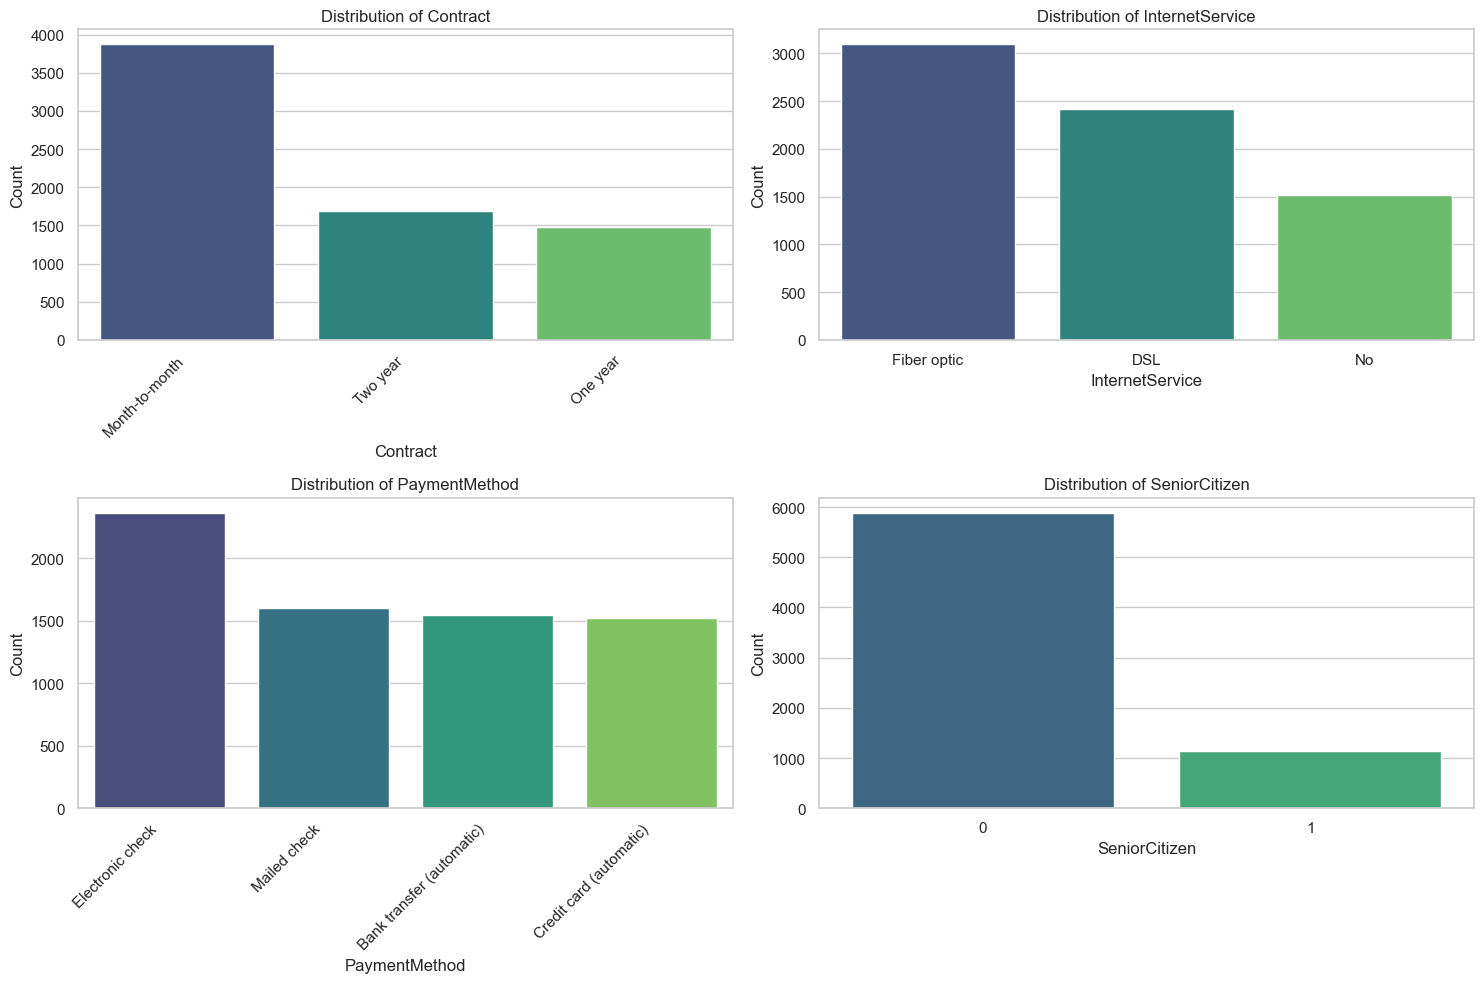

In [122]:
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_vars = ['Contract', 'InternetService', 'PaymentMethod', 'SeniorCitizen']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    counts = df[var].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')

    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_ylabel('Count')
    
    if var in ['PaymentMethod', 'Contract']:
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


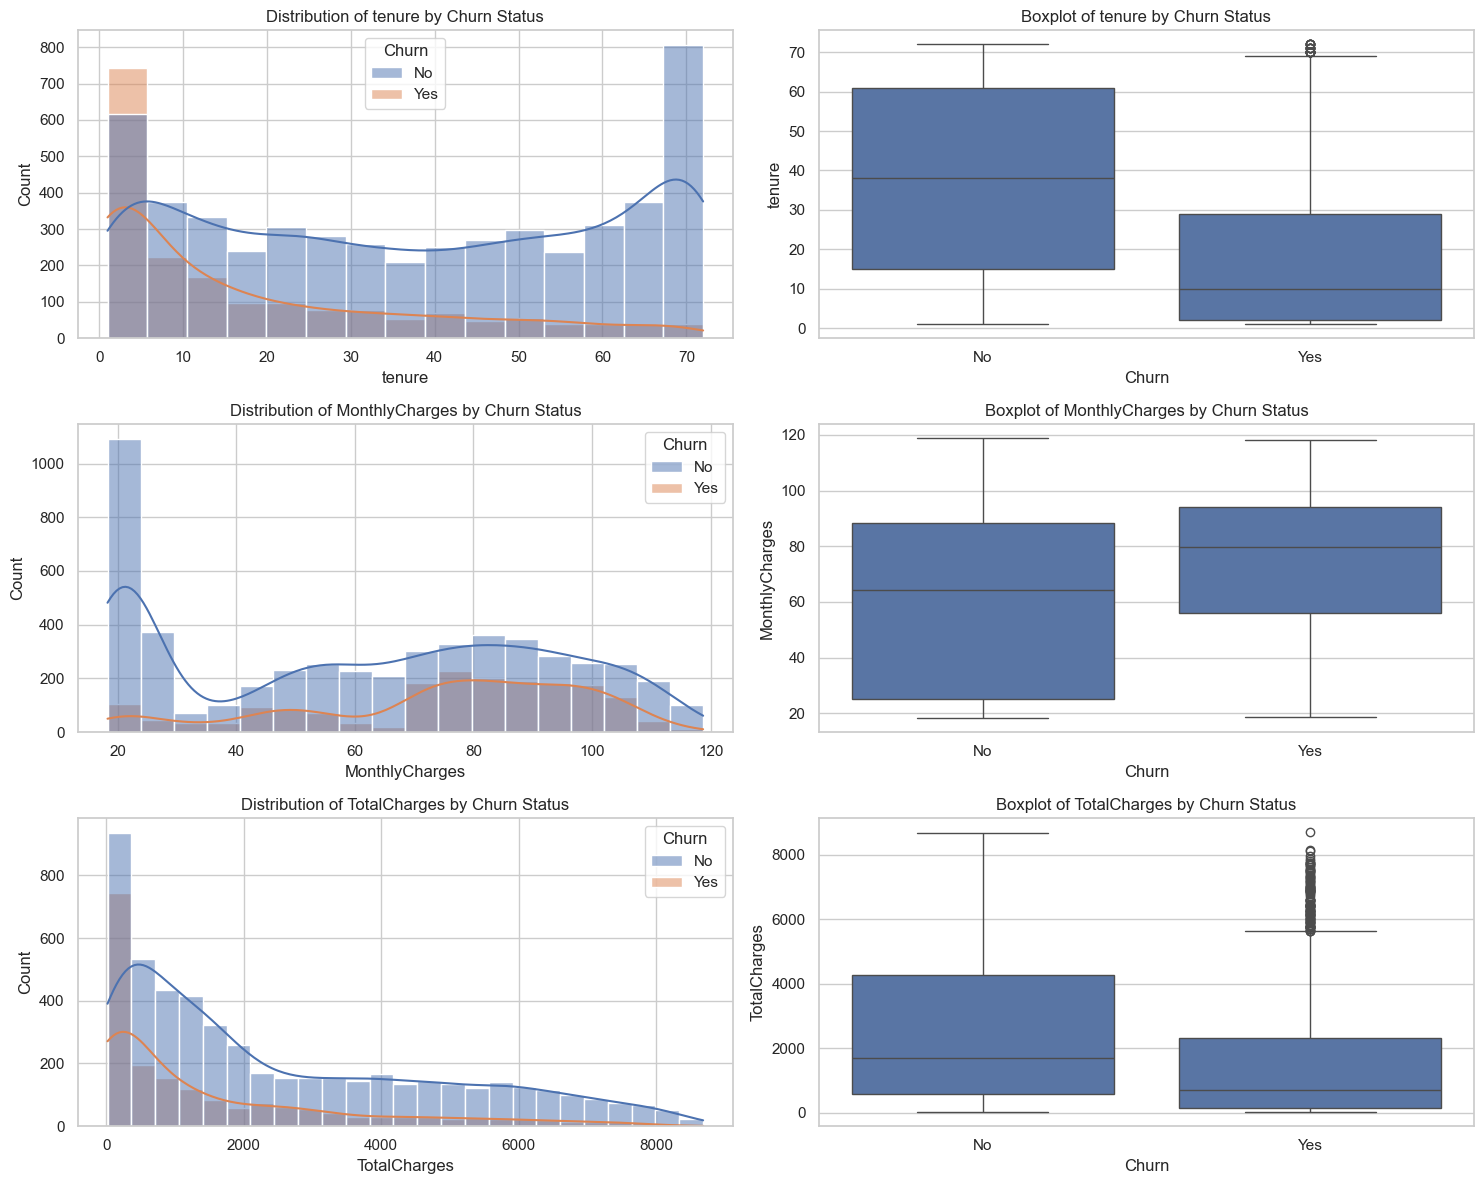

In [123]:
numerical_vars = ['tenure', 'MonthlyCharges', 'TotalCharges']
fig, axes = plt.subplots(len(numerical_vars), 2, figsize=(15, 12))

for i, var in enumerate(numerical_vars):
    sns.histplot(data=df, x=var, hue='Churn', kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Distribution of {var} by Churn Status')
    
    # Boxplot
    sns.boxplot(data=df, y=var, x='Churn', ax=axes[i, 1])
    axes[i, 1].set_title(f'Boxplot of {var} by Churn Status')

plt.tight_layout()
plt.show()

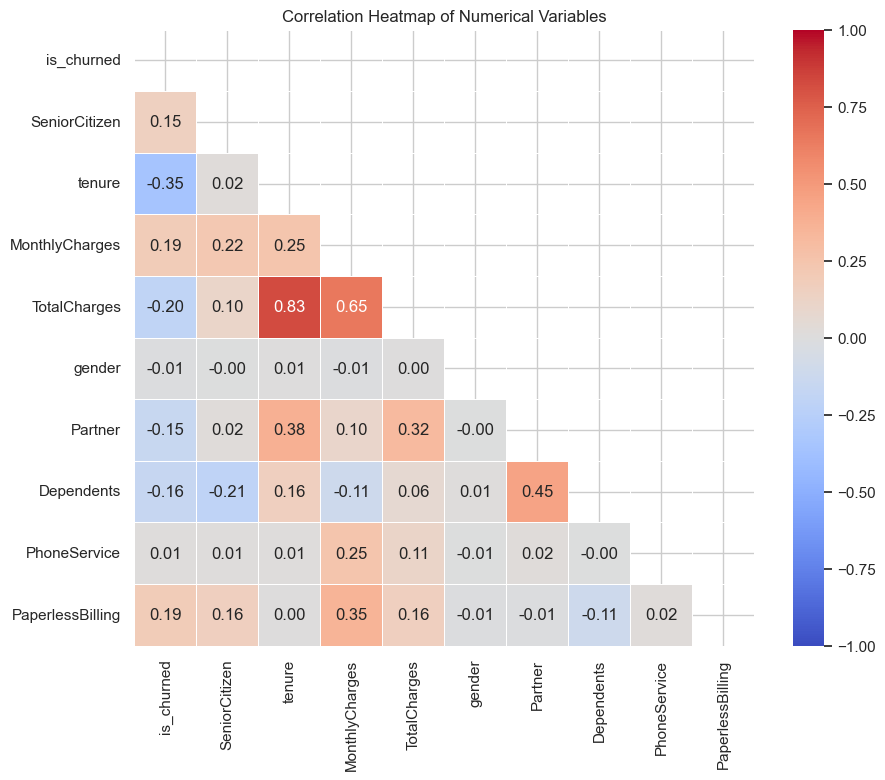

In [124]:
plt.figure(figsize=(10, 8))
df_corr = df.copy()
df_corr['is_churned'] = df_corr['Churn'].map({'Yes': 1, 'No': 0})

binary_vars = ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']
for var in binary_vars:
    df_corr[var] = df_corr[var].map({'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0})
numeric_cols = ['is_churned', 'SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'] + binary_vars

corr_matrix = df_corr[numeric_cols].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            vmin=-1, vmax=1, center=0, linewidths=.5)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


Pre-processing data

In [125]:
# Binary encoding for Yes/No variables
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
for col in binary_cols:
    df['has_' + col.lower()] = df[col].map({'Yes': 1, 'No': 0})

In [126]:
# Handle gender
df['is_male'] = df['gender'].map({'Male': 1, 'Female': 0})

df['is_senior_citizen'] = df['SeniorCitizen']

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0,1,0,0,1,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,0


In [127]:
internet_services = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies']
for service in internet_services:
    df['has_' + service.lower()] = df[service].map({'Yes': 1, 'No': 0, 'No internet service': 0})

df['has_multiple_lines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen,has_onlinesecurity,has_onlinebackup,has_deviceprotection,has_techsupport,has_streamingtv,has_streamingmovies,has_multiple_lines
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1,0,0,1,0,0,0,0,1,0,0,0,0,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,0,0,1,0,0,1,0,1,0,1,0,0,0,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,0,0,1,1,1,1,0,1,1,0,0,0,0,0
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,0,0,0,0,0,1,0,1,0,1,1,0,0,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,0,0,1,1,1,0,0,0,0,0,0,0,0,0


In [128]:
#one hot encoding multiple values
multi_cat_cols = ['InternetService', 'Contract', 'PaymentMethod']
df = pd.get_dummies(df, columns=multi_cat_cols, drop_first=False)

# Check the first few rows of the encoded dataset
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen,has_onlinesecurity,has_onlinebackup,has_deviceprotection,has_techsupport,has_streamingtv,has_streamingmovies,has_multiple_lines,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,No,Yes,No,No,No,No,Yes,29.85,29.85,No,1,0,0,1,0,0,0,0,1,0,0,0,0,0,True,False,False,True,False,False,False,False,True,False
1,5575-GNVDE,Male,0,No,No,34,Yes,No,Yes,No,Yes,No,No,No,No,56.95,1889.50,No,0,0,1,0,0,1,0,1,0,1,0,0,0,0,True,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,Male,0,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,0,0,1,1,1,1,0,1,1,0,0,0,0,0,True,False,False,True,False,False,False,False,False,True
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,Yes,No,Yes,Yes,No,No,No,42.30,1840.75,No,0,0,0,0,0,1,0,1,0,1,1,0,0,0,True,False,False,False,True,False,True,False,False,False
4,9237-HQITU,Female,0,No,No,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,0,0,1,1,1,0,0,0,0,0,0,0,0,0,False,True,False,True,False,False,False,False,True,False


In [130]:
df.shape

(7032, 42)

In [131]:
original_cols_to_drop = [
    'customerID', 
    'gender',     
    'SeniorCitizen', 
    'Partner',    
    'Dependents', 
    'PhoneService', 
    'MultipleLines', 
    'OnlineSecurity', 
    'OnlineBackup', 
    'DeviceProtection', 
    'TechSupport', 
    'StreamingTV', 
    'StreamingMovies', 
    'PaperlessBilling', 
    'Churn'       
]

df = df.drop(columns=original_cols_to_drop)
print(df.head())
print(df.info())

   tenure  MonthlyCharges  TotalCharges  has_partner  has_dependents  has_phoneservice  has_paperlessbilling  has_churn  is_male  is_senior_citizen  has_onlinesecurity  has_onlinebackup  has_deviceprotection  has_techsupport  has_streamingtv  has_streamingmovies  has_multiple_lines  InternetService_DSL  InternetService_Fiber optic  InternetService_No  Contract_Month-to-month  Contract_One year  Contract_Two year  PaymentMethod_Bank transfer (automatic)  PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  PaymentMethod_Mailed check
0       1           29.85         29.85            1               0                 0                     1          0        0                  0                   0                 1                     0                0                0                    0                   0                 True                        False               False                     True              False              False                             

In [132]:
df.describe()

,tenure,MonthlyCharges,TotalCharges,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen,has_onlinesecurity,has_onlinebackup,has_deviceprotection,has_techsupport,has_streamingtv,has_streamingmovies,has_multiple_lines
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.482509,0.298493,0.903299,0.592719,0.265785,0.504693,0.162400,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.421928
std,24.545260,30.085974,2266.771362,0.499729,0.457629,0.295571,0.491363,0.441782,0.500014,0.368844,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.493902
min,1.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.587500,401.450000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Feature Scaling and Data Splitting using scikit-learn

In [133]:

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled[numerical_features] = scaler.fit_transform(df_scaled[numerical_features])


print("Scaled numerical features:")
print(df_scaled[numerical_features].head())
print("\nScaler mean values:", scaler.mean_)
print("Scaler standard deviation values:", scaler.scale_)

Scaled numerical features:
     tenure  MonthlyCharges  TotalCharges
0 -1.280248       -1.161694     -0.994194
1  0.064303       -0.260878     -0.173740
2 -1.239504       -0.363923     -0.959649
3  0.512486       -0.747850     -0.195248
4 -1.239504        0.196178     -0.940457

Scaler mean values: [  32.42178612   64.79820819 2283.30044084]
Scaler standard deviation values: [  24.54351439   30.08383459 2266.61018071]


In [134]:
from sklearn.model_selection import train_test_split

X = df_scaled.drop('has_churn', axis=1)
y = df_scaled['has_churn']


X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)


print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in validation set:")
print(y_val.value_counts(normalize=True) * 100)

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)

Training set shape: (4922, 26) (4922,)
Validation set shape: (1055, 26) (1055,)
Test set shape: (1055, 26) (1055,)

Class distribution in training set:
has_churn
0    73.425437
1    26.574563
Name: proportion, dtype: float64

Class distribution in validation set:
has_churn
0    73.364929
1    26.635071
Name: proportion, dtype: float64

Class distribution in test set:
has_churn
0    73.459716
1    26.540284
Name: proportion, dtype: float64


In [135]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in validation set:")
print(y_val.value_counts(normalize=True) * 100)

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)




Class distribution in training set:
has_churn
1    50.0
0    50.0
Name: proportion, dtype: float64

Class distribution in validation set:
has_churn
0    73.364929
1    26.635071
Name: proportion, dtype: float64

Class distribution in test set:
has_churn
0    73.459716
1    26.540284
Name: proportion, dtype: float64


Training different models and checking which has better performance


Evaluating: Logistic Regression
Accuracy: 0.7640
Precision: 0.5412
Recall: 0.7473
F1-Score: 0.6278
ROC-AUC: 0.8430

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.77      0.83       774
           1       0.54      0.75      0.63       281

    accuracy                           0.76      1055
   macro avg       0.72      0.76      0.73      1055
weighted avg       0.80      0.76      0.77      1055



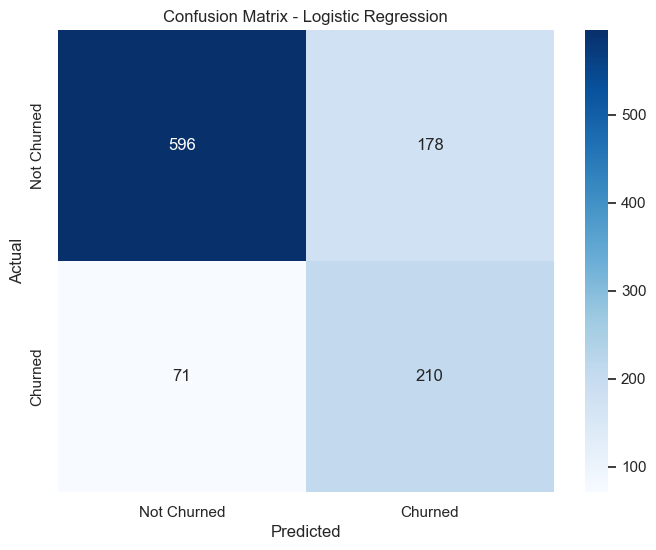

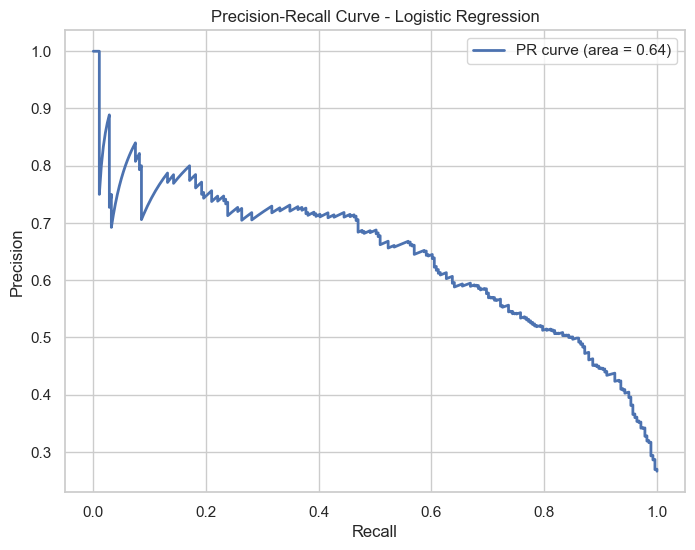


Evaluating: Random Forest
Accuracy: 0.7602
Precision: 0.5435
Recall: 0.6228
F1-Score: 0.5804
ROC-AUC: 0.8133

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       774
           1       0.54      0.62      0.58       281

    accuracy                           0.76      1055
   macro avg       0.70      0.72      0.71      1055
weighted avg       0.77      0.76      0.77      1055



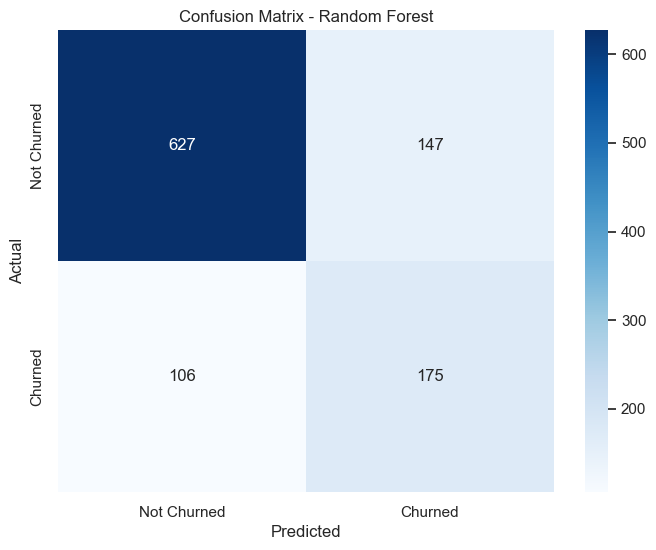

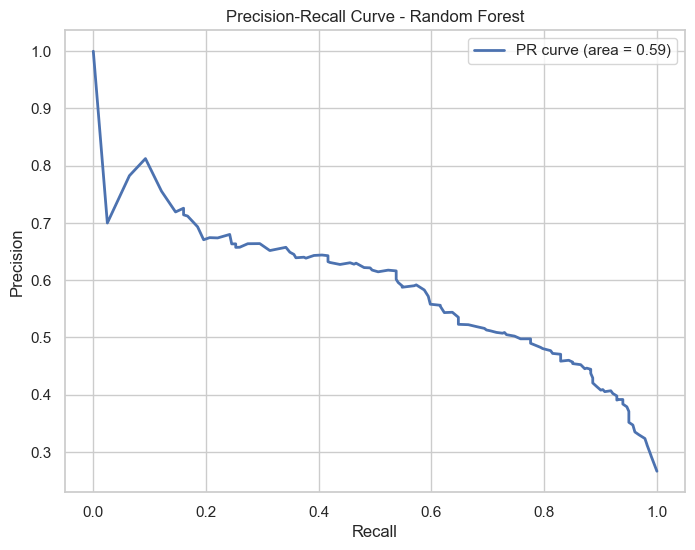


Evaluating: Gradient Boosting
Accuracy: 0.7678
Precision: 0.5446
Recall: 0.7829
F1-Score: 0.6423
ROC-AUC: 0.8412

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       774
           1       0.54      0.78      0.64       281

    accuracy                           0.77      1055
   macro avg       0.73      0.77      0.74      1055
weighted avg       0.81      0.77      0.78      1055



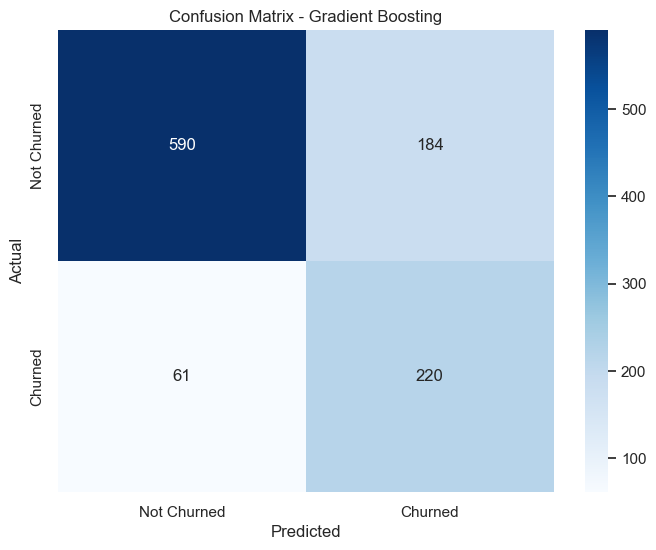

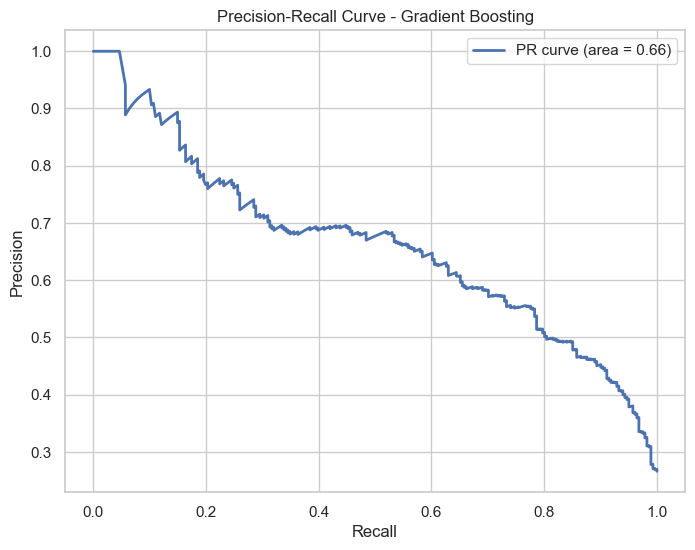


Best model based on F1-score: Gradient Boosting
F1-score: 0.6423
Precision: 0.5446
Recall: 0.7829


In [136]:
# Training classification models with comprehensive evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_auc_score, precision_score, recall_score, f1_score,
                            precision_recall_curve, auc)



models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


def plot_precision_recall_curve(y_true, y_probs, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    return pr_auc

results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating: {name}")
    print(f"{'='*50}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:,1]
    
    # Calculate various metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print performance metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Create and plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Create precision-recall curve
    pr_auc = plot_precision_recall_curve(y_val, y_pred_proba, name)
    results[name]['pr_auc'] = pr_auc

# Identify the best performing model based on F1-score (balanced metric)
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
print(f"\nBest model based on F1-score: {best_model_name}")
print(f"F1-score: {results[best_model_name]['f1_score']:.4f}")
print(f"Precision: {results[best_model_name]['precision']:.4f}")
print(f"Recall: {results[best_model_name]['recall']:.4f}")


Enhancing performance of logistic regression

In [137]:
# Create service density metrics

df_scaled['internet_services_count'] = df_scaled[['has_onlinesecurity', 'has_onlinebackup', 
                                   'has_deviceprotection', 'has_techsupport', 
                                   'has_streamingtv', 'has_streamingmovies']].sum(axis=1)

In [138]:
df_scaled.head()

,tenure,MonthlyCharges,TotalCharges,has_partner,has_dependents,has_phoneservice,has_paperlessbilling,has_churn,is_male,is_senior_citizen,has_onlinesecurity,has_onlinebackup,has_deviceprotection,has_techsupport,has_streamingtv,has_streamingmovies,has_multiple_lines,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,internet_services_count
0,-1.280248,-1.161694,-0.994194,1,0,0,1,0,0,0,0,1,0,0,0,0,0,True,False,False,True,False,False,False,False,True,False,1
1,0.064303,-0.260878,-0.173740,0,0,1,0,0,1,0,1,0,1,0,0,0,0,True,False,False,False,True,False,False,False,False,True,2
2,-1.239504,-0.363923,-0.959649,0,0,1,1,1,1,0,1,1,0,0,0,0,0,True,False,False,True,False,False,False,False,False,True,2
3,0.512486,-0.747850,-0.195248,0,0,0,0,0,1,0,1,0,1,1,0,0,0,True,False,False,False,True,False,True,False,False,False,3
4,-1.239504,0.196178,-0.940457,0,0,1,1,1,0,0,0,0,0,0,0,0,0,False,True,False,True,False,False,False,False,True,False,0


In [139]:
X = df_scaled.drop('has_churn', axis=1)
y = df_scaled['has_churn']

In [140]:
import pickle
import os

features = X.columns.tolist()

if not os.path.exists('models'):
    os.makedirs('models')

with open('models/model_features.pkl', 'wb') as f:
    pickle.dump(features, f)
    
print(f"Saved {len(features)} features to models/model_features.pkl")
print('features', features, 'of length ', len(features))
print('df columns', df_scaled.columns, 'of length ', len(df_scaled.columns))

Saved 27 features to models/model_features.pkl
features ['tenure', 'MonthlyCharges', 'TotalCharges', 'has_partner', 'has_dependents', 'has_phoneservice', 'has_paperlessbilling', 'is_male', 'is_senior_citizen', 'has_onlinesecurity', 'has_onlinebackup', 'has_deviceprotection', 'has_techsupport', 'has_streamingtv', 'has_streamingmovies', 'has_multiple_lines', 'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No', 'Contract_Month-to-month', 'Contract_One year', 'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)', 'PaymentMethod_Credit card (automatic)', 'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check', 'internet_services_count'] of length  27
df columns Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'has_partner', 'has_dependents', 'has_phoneservice', 'has_paperlessbilling', 'has_churn', 'is_male', 'is_senior_citizen', 'has_onlinesecurity', 'has_onlinebackup', 'has_deviceprotection', 'has_techsupport', 'has_streamingtv', 'has_streamingmovie

In [142]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

smote_tomek = SMOTETomek(random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)


print("Training set shape:", X_train.shape, y_train.shape)
print("Validation set shape:", X_val.shape, y_val.shape)
print("Test set shape:", X_test.shape, y_test.shape)


print("\nClass distribution in training set:")
print(y_train.value_counts(normalize=True) * 100)

print("\nClass distribution in validation set:")
print(y_val.value_counts(normalize=True) * 100)

print("\nClass distribution in test set:")
print(y_test.value_counts(normalize=True) * 100)

Training set shape: (6972, 27) (6972,)
Validation set shape: (1055, 27) (1055,)
Test set shape: (1055, 27) (1055,)

Class distribution in training set:
has_churn
1    50.0
0    50.0
Name: proportion, dtype: float64

Class distribution in validation set:
has_churn
0    73.364929
1    26.635071
Name: proportion, dtype: float64

Class distribution in test set:
has_churn
0    73.459716
1    26.540284
Name: proportion, dtype: float64



Evaluating: Logistic Regression
Accuracy: 0.7678
Precision: 0.5466
Recall: 0.7509
F1-Score: 0.6327
ROC-AUC: 0.8457

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       774
           1       0.55      0.75      0.63       281

    accuracy                           0.77      1055
   macro avg       0.72      0.76      0.73      1055
weighted avg       0.80      0.77      0.78      1055



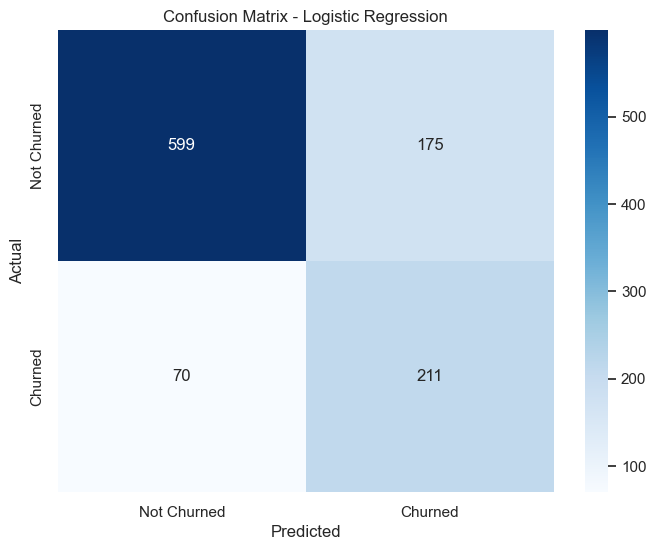

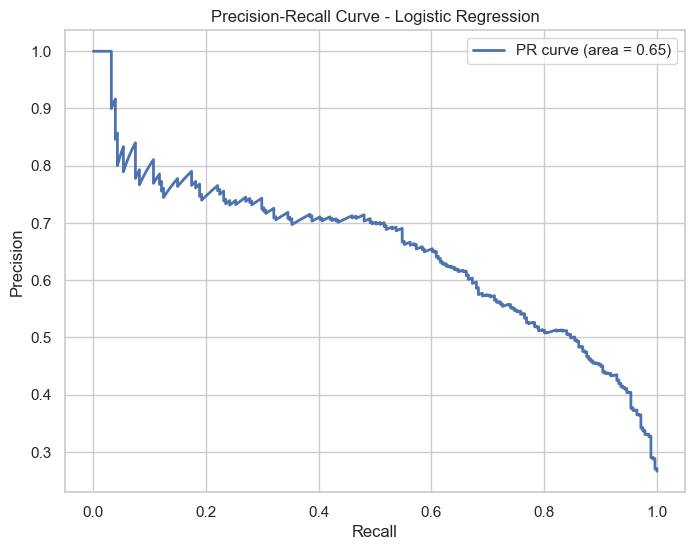


Evaluating: Random Forest
Accuracy: 0.7725
Precision: 0.5647
Recall: 0.6370
F1-Score: 0.5987
ROC-AUC: 0.8181

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.82      0.84       774
           1       0.56      0.64      0.60       281

    accuracy                           0.77      1055
   macro avg       0.71      0.73      0.72      1055
weighted avg       0.78      0.77      0.78      1055



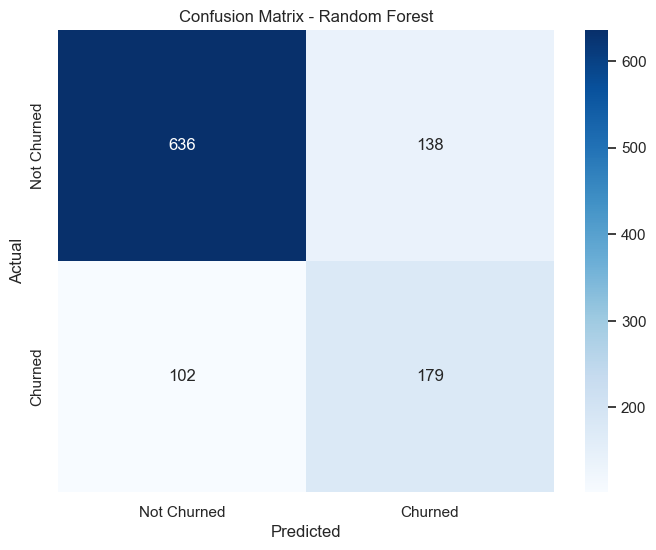

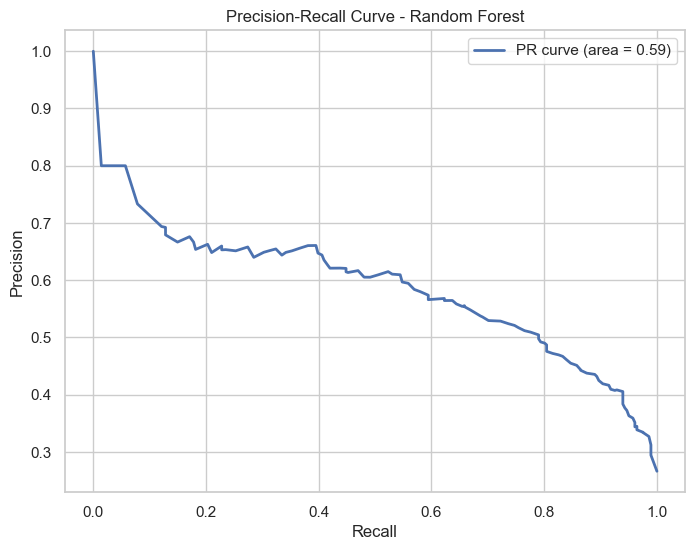


Evaluating: Gradient Boosting
Accuracy: 0.7602
Precision: 0.5345
Recall: 0.7722
F1-Score: 0.6317
ROC-AUC: 0.8424

Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       774
           1       0.53      0.77      0.63       281

    accuracy                           0.76      1055
   macro avg       0.72      0.76      0.73      1055
weighted avg       0.80      0.76      0.77      1055



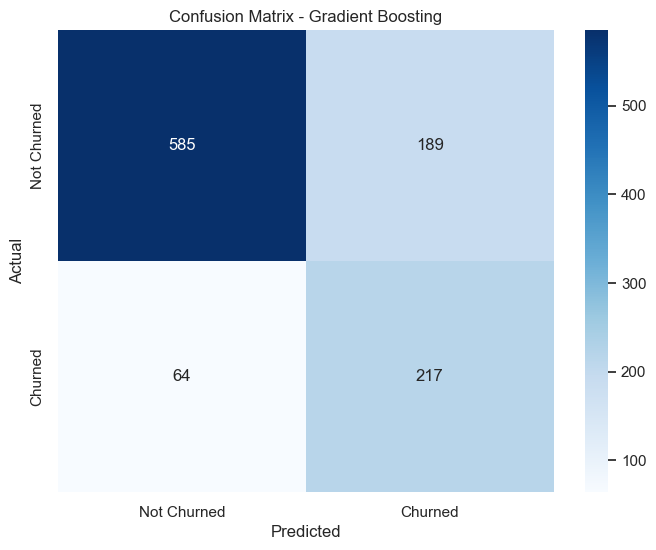

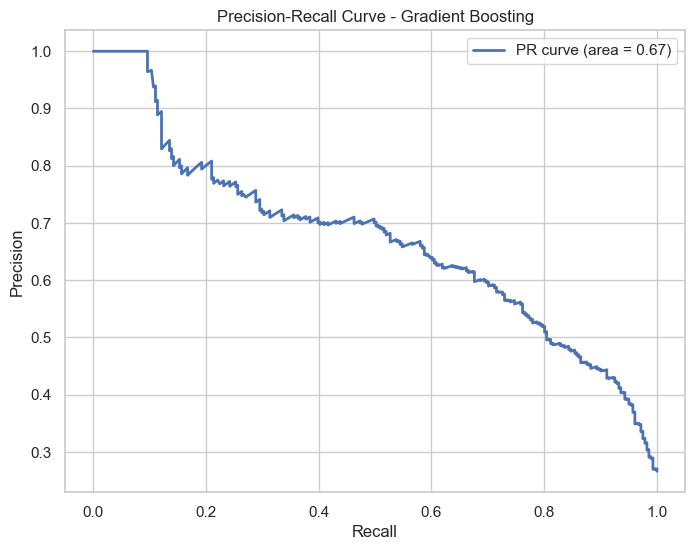


Best model based on F1-score: Logistic Regression
F1-score: 0.6327
Precision: 0.5466
Recall: 0.7509


In [143]:
# Training classification models with comprehensive evaluation metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import (accuracy_score, classification_report, confusion_matrix, 
                            roc_auc_score, precision_score, recall_score, f1_score,
                            precision_recall_curve, auc)



models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42)
}


def plot_precision_recall_curve(y_true, y_probs, model_name):
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    pr_auc = auc(recall, precision)
    plt.figure(figsize=(8, 6))
    plt.plot(recall, precision, lw=2, label=f'PR curve (area = {pr_auc:.2f})')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title(f'Precision-Recall Curve - {model_name}')
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()
    return pr_auc

results = {}
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Evaluating: {name}")
    print(f"{'='*50}")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions on validation set
    y_pred = model.predict(X_val)
    y_pred_proba = model.predict_proba(X_val)[:,1]
    
    # Calculate various metrics
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    roc_auc = roc_auc_score(y_val, y_pred_proba)
    
    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    # Print performance metrics
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")
    
    # Print detailed classification report
    print("\nClassification Report:")
    print(classification_report(y_val, y_pred))
    
    # Create and plot confusion matrix
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not Churned', 'Churned'],
                yticklabels=['Not Churned', 'Churned'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()
    
    # Create precision-recall curve
    pr_auc = plot_precision_recall_curve(y_val, y_pred_proba, name)
    results[name]['pr_auc'] = pr_auc

# Identify the best performing model based on F1-score (balanced metric)
best_model_name = max(results, key=lambda x: results[x]['f1_score'])
print(f"\nBest model based on F1-score: {best_model_name}")
print(f"F1-score: {results[best_model_name]['f1_score']:.4f}")
print(f"Precision: {results[best_model_name]['precision']:.4f}")
print(f"Recall: {results[best_model_name]['recall']:.4f}")


Testing on Test Dataset


FINAL MODEL EVALUATION ON TEST SET
Accuracy: 0.7498
Precision: 0.5216
Recall: 0.6893
F1-Score: 0.5938
ROC-AUC: 0.8137

Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.77      0.82       775
           1       0.52      0.69      0.59       280

    accuracy                           0.75      1055
   macro avg       0.70      0.73      0.71      1055
weighted avg       0.78      0.75      0.76      1055



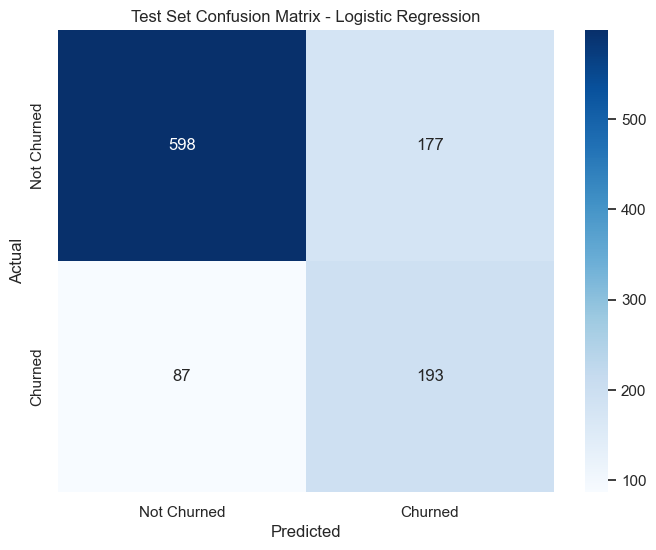

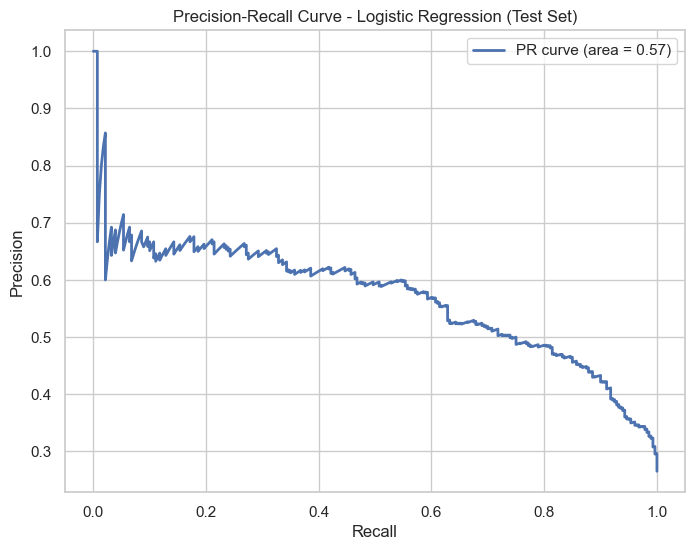


Validation vs Test Performance:
      Metric  Validation Set  Test Set
0   Accuracy        0.767773  0.749763
1  Precision        0.546632  0.521622
2     Recall        0.750890  0.689286
3   F1-Score        0.632684  0.593846
4    ROC-AUC        0.845662  0.813657

Performance Difference (Validation - Test):
      Metric  Difference  Percent Change
0   Accuracy    0.018009            2.35
1  Precision    0.025011            4.58
2     Recall    0.061604            8.20
3   F1-Score    0.038838            6.14
4    ROC-AUC    0.032006            3.78

Top 10 Factors INCREASING Churn Probability:
                                    Feature  Coefficient
18                       InternetService_No     3.713376
24           PaymentMethod_Electronic check     3.683781
19                  Contract_Month-to-month     3.581458
1                            MonthlyCharges     3.389873
25               PaymentMethod_Mailed check     3.244810
23    PaymentMethod_Credit card (automatic)     3.1736

In [144]:
best_model = results['Logistic Regression']['model']

# Make predictions on test set
test_predictions = best_model.predict(X_test)
test_probabilities = best_model.predict_proba(X_test)[:,1]

# Calculate metrics
test_accuracy = accuracy_score(y_test, test_predictions)
test_precision = precision_score(y_test, test_predictions)
test_recall = recall_score(y_test, test_predictions)
test_f1 = f1_score(y_test, test_predictions)
test_roc_auc = roc_auc_score(y_test, test_probabilities)

# Print test performance metrics
print(f"\n{'='*50}")
print("FINAL MODEL EVALUATION ON TEST SET")
print(f"{'='*50}")
print(f"Accuracy: {test_accuracy:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Recall: {test_recall:.4f}")
print(f"F1-Score: {test_f1:.4f}")
print(f"ROC-AUC: {test_roc_auc:.4f}")

print("\nTest Set Classification Report:")
print(classification_report(y_test, test_predictions))

plt.figure(figsize=(8, 6))
test_cm = confusion_matrix(y_test, test_predictions)
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Churned', 'Churned'],
            yticklabels=['Not Churned', 'Churned'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Test Set Confusion Matrix - Logistic Regression')
plt.show()

test_pr_auc = plot_precision_recall_curve(y_test, test_probabilities, "Logistic Regression (Test Set)")

# Compare validation and test performance
performance_comparison = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC'],
    'Validation Set': [
        results['Logistic Regression']['accuracy'],
        results['Logistic Regression']['precision'],
        results['Logistic Regression']['recall'],
        results['Logistic Regression']['f1_score'],
        results['Logistic Regression']['roc_auc']
    ],
    'Test Set': [test_accuracy, test_precision, test_recall, test_f1, test_roc_auc]
})

print("\nValidation vs Test Performance:")
print(performance_comparison)

# Calculate performance differences
performance_comparison['Difference'] = performance_comparison['Validation Set'] - performance_comparison['Test Set']
performance_comparison['Percent Change'] = (performance_comparison['Difference'] / performance_comparison['Validation Set'] * 100).round(2)
print("\nPerformance Difference (Validation - Test):")
print(performance_comparison[['Metric', 'Difference', 'Percent Change']])

# Extract and analyze feature coefficients
if hasattr(best_model, 'coef_'):
    coefficients = best_model.coef_[0]
    feature_importance = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': coefficients
    }).sort_values('Coefficient', ascending=False)
    
    print("\nTop 10 Factors INCREASING Churn Probability:")
    print(feature_importance.head(10))
    
    print("\nTop 10 Factors DECREASING Churn Probability:")
    print(feature_importance.tail(10))


In [ ]:
import pickle
model_filename = 'model.pkl'

# Save the model
with open(f'models/{model_filename}', 'wb') as file:
    pickle.dump(best_model, file)

print(f"Model saved as {model_filename}")


Model saved as model.pkl
